# ITC 686 FINAL PROJECT

## PART 3 (Data Analysis)

### Data Loading

Imported necessary module, connected to our MongoDB and created a connection to our databasename, with our collection and required documents.

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["finalprojectdatabase"]
mycol = mydb["amazon_reviews"]

Loaded the collection containing the required documents to a pandas dataframe and then checked the first 5 rows to confirm it was done correctly

In [2]:
data = pd.DataFrame(list(mycol.find()))
data.head(5)

,_id,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,1,US,9970739,R8EWA1OFT84NX,B00GSP5D94,329991347,Summer Infant SwaddleMe Adjustable Infant Wrap...,Baby,5,0.0,0.0,N,Y,Great swaddled blankets,Loved these swaddle blankets and so did my dau...,2015-08-31
1,2,US,23538442,R2JWY4YRQD4FOP,B00YYDDZGU,646108902,Pacifier Clip Girl (3 Pack) Ziggy Baby 2-Sided...,Baby,5,0.0,0.0,N,N,Too cute and really nice,These are adorable pacifier clips. SavvyBaby h...,2015-08-31
2,3,US,8273344,RL5ESX231LZ0B,B00BUBNZC8,642922361,Udder Covers - Breast Feeding Nursing Cover,Baby,5,0.0,0.0,N,Y,Five Stars,Great gift,2015-08-31
3,4,US,24557753,RRMS9ZWJ2KD08,B00AWLZFTS,494272733,Gerber Graduates Fun Pack Utensils,Baby,5,0.0,0.0,N,Y,Cute; wash up nicely in dishwasher.,These forks are great for my 10 month old daug...,2015-08-31
4,5,US,46263340,R14I3ZG5E6S7YM,B00KM60D3Q,305813185,Summer Infant Ultra Sight Pan/Scan/Zoom Video ...,Baby,5,0.0,0.0,N,Y,Love it!,I wanted something for piece of mind with my l...,2015-08-31


### Data Preparation and Cleaning

First we checked the data type of each column and then changed to necessary data type

In [3]:
data.dtypes

_id                    int64
marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

In [4]:
data["review_date"] = pd.to_datetime(data["review_date"])

You can refer to the second notebook of this project were we made a second query of the MongoDB, this was the workaround we discuss there. The argument of the to_numeric() pandas method **errors='coerce'** changes values of the first argument that gives ValuerError to na (missing).

In [5]:
data["star_rating"] = pd.to_numeric(data["star_rating"], errors='coerce') 

Checking the data types again to confirm all changes made is in effect.

In [6]:
data.dtypes

_id                           int64
marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                 float64
helpful_votes               float64
total_votes                 float64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
dtype: object

All duplicates in our dataframe was dropped. Note that the check on duplicate was on all columns except the **_id**,this is so because when we created our _id column in second jupyter notebook, a requirement of MongoDB was that it values should be unique has it is an idenfier for a document and if we had select the duplicate check on all columns here no record would have been dropped if there were such duplicates. 

We then also dropped missing values, note that, no form of imputation was done here as most of our columns are text or numbers with redundant computational use, e.g. customer_id which is a number serving as a unique identifier of a particular customer. If we made our imputation based on the mean/median/mode of values of this column we would be introducing error to this dataset by making a new value from the mean/median that may not stand as a customer or assigning a customer to a product he never made a review.

In [7]:
data = data.drop_duplicates(subset=([c for c in data.columns if c!='_id']))

In [8]:
data = data.dropna()

We created two columns with the codes in the two cells below which would be used for our data visualization.

In [9]:
data['review_year'] = pd.DatetimeIndex(data['review_date']).year

In [10]:
def func(x):
    if x > 3:
        return 'positive'
    elif x < 3:
        return 'negative'
    else:
        return 'neutral'
    

data["rating_class"] = data["star_rating"].apply(func)

### Exploratory Data Analysis

Below is a code showing the descriptive statistics of numeric columns of our data.

Please note that though **_id, customer_id, product_parent, and review_year** have numeric values/ can be seen in there numeric sense (review_year being datetime can also be seen as numeric in pandas/python), their respective descriptive statistics were computed but this computation has no use/meaning as explained earlier.

In [11]:
data.describe()

,_id,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_year
count,7.479937e+06,7.479937e+06,7.479937e+06,7.479937e+06,7.479937e+06,7.479937e+06,7.479937e+06
mean,3.740281e+06,2.856142e+07,5.037022e+08,4.078229e+00,1.820961e+00,2.251223e+00,2.013012e+03
std,2.159390e+06,1.530187e+07,2.883961e+08,1.364085e+00,2.687860e+01,2.790602e+01,2.432249e+00
min,1.000000e+00,1.000500e+04,8.550000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.998000e+03
25%,1.870199e+06,1.499013e+07,2.519437e+08,4.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03
50%,3.740284e+06,2.768799e+07,5.038381e+08,5.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03
75%,5.610385e+06,4.288564e+07,7.553946e+08,5.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03
max,7.480426e+06,5.309658e+07,9.999982e+08,5.000000e+00,4.139300e+04,4.186600e+04,2.015000e+03


Some variables were created below using the groupby() method with some summary/aggregation, each variables respective result is shown below and they are use in our data visualization

In [12]:
G1 = data['star_rating'].groupby([data['product_category'], data['review_year']]).mean()
G2 = data['star_rating'].groupby(data['review_year']).mean()
G3 = data['star_rating'].groupby(data['product_category']).mean()
G4 = data['rating_class'].groupby([data['product_category'], data['rating_class']]).count()

In [13]:
G1

product_category  review_year
Baby              1999           4.553571
                  2000           4.369099
                  2001           3.902136
                  2002           3.690339
                  2003           3.726006
                  2004           3.728220
                  2005           3.818758
                  2006           3.879343
                  2007           4.050194
                  2008           4.101092
                  2009           4.057668
                  2010           4.024324
                  2011           4.017681
                  2012           4.071620
                  2013           4.192108
                  2014           4.204380
                  2015           4.244110
Electronics       1999           3.904422
                  2000           3.965114
                  2001           3.744025
                  2002           3.620401
                  2003           3.611213
                  2004           3.527778
    

In [14]:
G2

review_year
1998    4.500000
1999    3.943026
2000    3.891696
2001    3.689254
2002    3.592541
2003    3.591268
2004    3.560188
2005    3.662405
2006    3.706104
2007    3.935603
2008    3.933324
2009    3.913774
2010    3.902296
2011    3.910255
2012    3.967755
2013    4.085282
2014    4.133498
2015    4.179829
Name: star_rating, dtype: float64

In [15]:
G3

product_category
Baby               4.162525
Electronics        4.035425
Office Products    4.072499
Name: star_rating, dtype: float64

In [16]:
G4

product_category  rating_class
Baby              negative         244872
                  neutral          149579
                  positive        1354497
Electronics       negative         536815
                  neutral          238376
                  positive        2315686
Office Products   negative         445344
                  neutral          193680
                  positive        2001088
Name: rating_class, dtype: int64

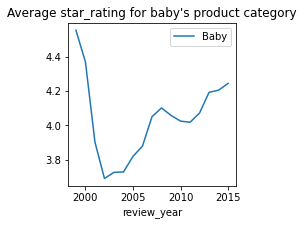

In [17]:
G1.unstack(0)['Baby'].plot(title="Average star_rating for baby's product category", figsize=(3, 3))
plt.legend(loc='upper right')
plt.show()

From the graph above we see that the average star_rating for baby's product was at its highest in 1999 and lowest in 2002 with its value picking steading after 2002.

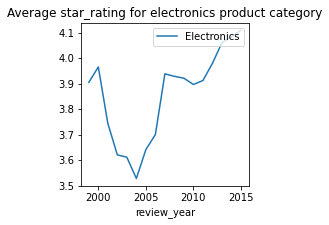

In [18]:
G1.unstack(0)['Electronics'].plot(title="Average star_rating for electronics product category", figsize=(3, 3))
plt.legend(loc='upper right')
plt.show()

From the graph above we see that the average star_rating for electronic's product was at its highest in 2000 and lowest in 2004 with its value picking steading after 2004

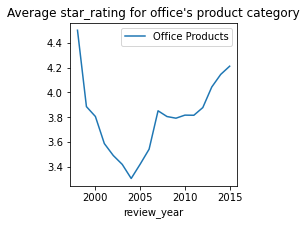

In [19]:
G1.unstack(0)['Office Products'].plot(title="Average star_rating for office's product category", figsize=(3, 3))
plt.legend(loc='upper right')
plt.show()

From the graph above we see that the average star_rating for office's product was at its highest in 1998 and lowest in 2004 with its value picking steading after 2004

<AxesSubplot:title={'center':'Average Star rating from 1998 to 2015'}, xlabel='review_year'>

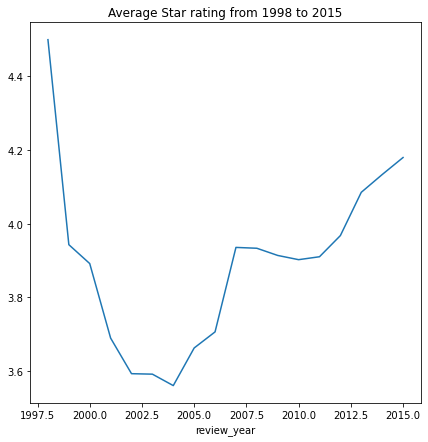

In [20]:
G2.plot.line(title='Average Star rating from 1998 to 2015',figsize=(7,7))

From the graph above we see that the average star_rating for these three product category in general was at its highest in 1998 and lowest in 2004 with its value picking steading after 2004

<AxesSubplot:title={'center':'Product Rating class'}, ylabel='product_category'>

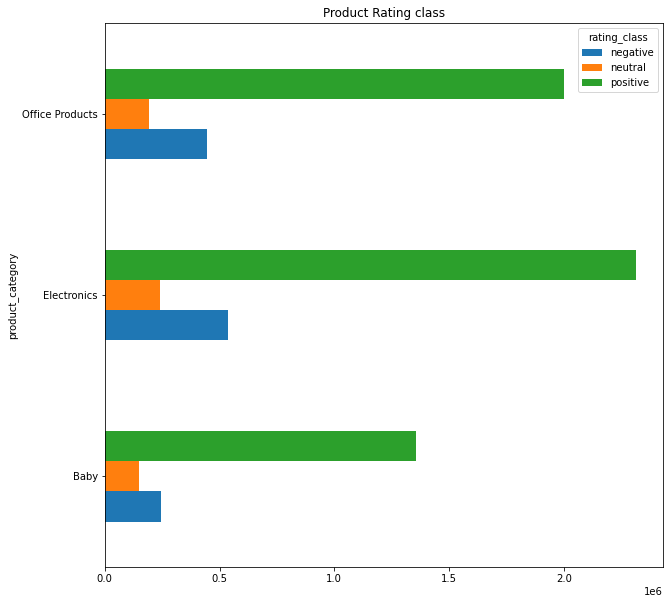

In [21]:
G4.unstack('rating_class').plot(title='Product Rating class',kind='barh', stacked=False, figsize=(10,10))

From the graph above we see that the Electronics had the highest count of positive rating (sar_rating > 3) compared to the other category and baby's product had the lowest count of positive rating.

In [22]:
G5 = data['rating_class'].groupby(data['rating_class']).count()

In [23]:
G5

rating_class
negative    1227031
neutral      581635
positive    5671271
Name: rating_class, dtype: int64

<AxesSubplot:title={'center':'Average Star rating from 1998 to 2015'}>

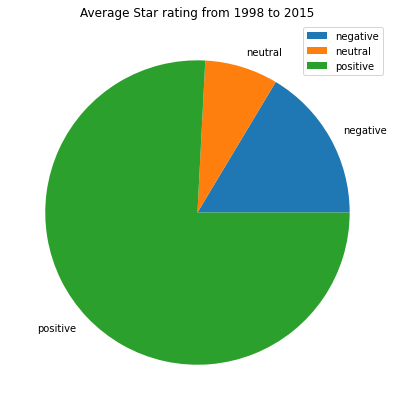

In [24]:
G5.plot.pie(title='Average Star rating from 1998 to 2015',figsize=(7,7), ylabel='', legend=True)

We also considered the rating class for the three products and the count for each of its respective levels (positive: star_rating > 3, neutral: star_rating = 3, negative: star_rating < 3).

From the pie chart above we see that the count of positive rating is overwhelming compared to other levels which is good.

### Sentiment Analysis using Logistic regression

Our goal was to determine if a particular review of a product left by a customer determines if a positive or negative rating would be given for that product.

So our focus were on two columns review_body (this column contains a particular review of a product left by a customer) and star_rating (the rating of that product given by that customer).

We would be using **sklearn** has the module for our model and since we are dealing with text as our input variable (review_body) this had to be converted to a form of numeric value as most machine learning models deal with numbers.

For our text column (review_body), there were three things we wanted to consider: **Tokenization, Stemming, and Lemmatization**, we later only considered tokenization because of the complexity when considering stemming (the process of chopping of words in several forms so as to get it base form e.g run, running when stemming is done should give run so if there is an occurrence of any three of these words it would not be counted as three words but just one word) and lemmatization (the process of converting any form of a work to its origin/ base form e.g ring, rang, rung, ringing all have a lemma ring). We avoided this because we had a very large volume of data which we ran on our local pc and we wanted to reduce the likelihood of improper stemming or lemmatiation that could arise to not to straight forward words.

Tokenization which we only considered is were a phrase, clause, sentence (or in generally running words in a text) is broken to the individual words making this text.

For this to happen, we removed punctuation from the review_body column and assign it to a new column called review_body_clean, we filtered out all records that that a star_rating = 3 as this were the products with neutral rating and for the target variable, we created a new variable called **label** which gives a value of +1 to values of star_rating > 3 and -1 to values of star_rating < 3.

Cells with the codes for the above is shown below.

In [25]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for a in string:
        if a in punc:
            string = string.replace(a, "")
    return string

data['review_body_clean'] = data["review_body"].apply(remove_punc)

In [26]:
data = data[data['star_rating'] != 3]

In [27]:
def func1(x):
    if x > 3:
        return +1
    else:
        return -1
data['label'] = data["star_rating"].apply(func1)

Because of the sheer volume of our data, we kept getting a MemoryError when we used the full data set in the model, so we worked with a random sample of size 50,000 from our data which we called sdata.

In [28]:
sdata = data.sample(n=50000, random_state=1)

In [29]:
!pip install sklearn

In [30]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(sdata, columns = ['review_body_clean'])
y = pd.DataFrame(sdata, columns = ['label'])

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=50)

We used the Bag of words model for our text vectorization. You can see this has a bag that has all the unique words and their count that exist in a text (in this case the column review_body_clean).

The vectorization (encoding to convert text to numbers) of the text input variable considered in sklean was CountVectorizer and by default it first converts a text to lowercase, the token_pattern we looked at was **r'\b\w+\b'** which looked at each word in each product review as a token. See code below.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern=r'\b\w+\b')
train_v = cv.fit_transform(train_X['review_body_clean'])
test_v = cv.transform(test_X['review_body_clean'])

We then ran the model and scored it, we got a warning that the default maximum iteration which is 100 for the model has been reached so computations were stopped and the solution does not converge, so solve this we increase the maximum iteration to 1000, which is shown below.

In [33]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(train_v, train_y.values.ravel())
scores = lreg.score(test_v, test_y)
scores

C:\Users\eemer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.91696

In [35]:
lreg1 = LogisticRegression(solver='lbfgs', max_iter=1000)
lreg1.fit(train_v, train_y.values.ravel())
scores1 = lreg1.score(test_v, test_y)
scores1

0.91872

From the score above, it shows that the prediction of the rating (label) from the model built on the 50,000 sample is very high, meaning that the review left by a customer is really useful in prediction the star rating class that would be given for that product.

### References

1. ITC 686 course materials: https://blackboard.cmich.edu/ultra/courses/_202035_1/cl/outline

2. https://www.kaggle.com/cynthiarempel/amazon-us-customer-reviews-dataset?select=amazon_reviews_us_Baby_v1_00.tsv

3. https://www.kaggle.com/cynthiarempel/amazon-us-customer-reviews-dataset?select=amazon_reviews_us_Electronics_v1_00.tsv

4. https://www.kaggle.com/cynthiarempel/amazon-us-customer-reviews-dataset?select=amazon_reviews_us_Office_Products_v1_00.tsv

5. https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset?select=amazon_reviews_us_Toys_v1_00.tsv

6. https://towardsdatascience.com/sentiment-analysis-using-logistic-regression-and-naive-bayes-16b806eb4c4b

7. https://medium.com/@qempsil0914/machine-learning-nlp-text-classification-with-amazon-review-data-using-python3-step-by-step-3fb0cc0cecc1

8. https://pymongo.readthedocs.io/en/latest/tutorial.html#querying-for-more-than-one-document

9. https://kavita-ganesan.com/how-to-use-countvectorizer/#.Ymu6S9rMJaZ